<a href="https://colab.research.google.com/github/johnjdailey/DS-Unit-1-Sprint-2-Statistics/blob/master/DS-Unit-1-Sprint-2-Statistics/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


1. Generate and numerically represent a confidence interval

In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-02-03 02:12:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-02-03 02:12:29 (517 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [9]:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

df = pd.read_csv('house-votes-84.data',
                 header=None,
                 names=column_headers,
                 na_values='?')

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [10]:
df = df.replace({'y': 1, 'n': 0})
df.head

<bound method NDFrame.head of           party  handicapped-infants  ...  duty-free  south-africa
0    republican                  0.0  ...        0.0           1.0
1    republican                  0.0  ...        0.0           NaN
2      democrat                  NaN  ...        0.0           0.0
3      democrat                  0.0  ...        0.0           1.0
4      democrat                  1.0  ...        1.0           1.0
..          ...                  ...  ...        ...           ...
430  republican                  0.0  ...        0.0           1.0
431    democrat                  0.0  ...        0.0           1.0
432  republican                  0.0  ...        0.0           1.0
433  republican                  0.0  ...        0.0           1.0
434  republican                  0.0  ...        NaN           0.0

[435 rows x 17 columns]>

In [11]:
df.isnull().sum()

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

In [0]:
def confidence_interval(data, confidence=0.95):

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence) /2.0, n - 1)
  return (mean, mean - moe, mean + moe)

In [17]:
congress = np.random.binomial(n=1, p=.5, size = 434)
confidence_interval(congress)

(0.5207373271889401, 0.47355102731111576, 0.5679236270667644)

In [18]:
congress = np.random.binomial(n=1, p=.5, size=434)
confidence_interval(congress)

(0.48847926267281105, 0.4412648649575136, 0.5356936603881085)

2. Graphically (with a plot) represent the confidence interval

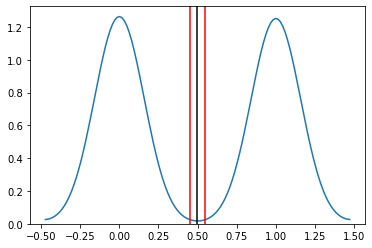

In [23]:
congress = np.random.binomial(n=1, p=.5, size=434)
sns.kdeplot(congress)
CI = confidence_interval(congress)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k')

3. Interpret the confidence interval - what does it tell you about the data and its distribution?

In [0]:
# 50% (0.5) is the point estimate, and +/- 5% (the interval  [0.45,0.55] ) is the confidence interval. 

# "95% confidence" means a p-value ≤ 1 − 0.95 = 0.05 .

4. Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
By hand using Numpy
In a single line using Scipy

In [25]:
column_headers= ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                 'marital-status', 'occupation', 'relationship', 'race', 'sex',
                 'capital-gain', 'capital-loss', 'hours-per-week',
                 'native-country', 'income']

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

df = pd.read_csv(url, header=None, names=column_headers, na_values=" ?")

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [26]:
df.describe

<bound method NDFrame.describe of        age          workclass  fnlwgt  ... hours-per-week  native-country  income
0       39          State-gov   77516  ...             40   United-States   <=50K
1       50   Self-emp-not-inc   83311  ...             13   United-States   <=50K
2       38            Private  215646  ...             40   United-States   <=50K
3       53            Private  234721  ...             40   United-States   <=50K
4       28            Private  338409  ...             40            Cuba   <=50K
...    ...                ...     ...  ...            ...             ...     ...
32556   27            Private  257302  ...             38   United-States   <=50K
32557   40            Private  154374  ...             40   United-States    >50K
32558   58            Private  151910  ...             40   United-States   <=50K
32559   22            Private  201490  ...             20   United-States   <=50K
32560   52       Self-emp-inc  287927  ...             40   Unit

In [27]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [28]:
cut_points = [0, 9, 19, 29, 39, 49, 1000]
label_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
df['age_categories'] = pd.cut(df['age'], cut_points, labels=label_names)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_categories
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30-39
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50+
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30-39
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50+
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,20-29


In [30]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [31]:
df['age_categories'].value_counts()

30-39    8613
20-29    8054
40-49    7175
50+      7062
10-19    1657
0-9         0
Name: age_categories, dtype: int64

In [32]:
df = df.sort_values(by='age_categories', ascending=True)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_categories
3124,19,Private,181546,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K,10-19
1420,19,NaN,172582,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,50,United-States,<=50K,10-19
26119,18,NaN,344742,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K,10-19
19273,18,Private,308889,11th,7,Never-married,Adm-clerical,Other-relative,Asian-Pac-Islander,Female,0,0,20,United-States,<=50K,10-19
23109,17,NaN,215743,11th,7,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K,10-19


In [35]:
contingency_table = pd.crosstab(df['sex'], df['age_categories'], margins=True)

contingency_table

age_categories,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,
Female,810,3176,2576,2161,2048,10771
Male,847,4878,6037,5014,5014,21790
All,1657,8054,8613,7175,7062,32561


In [36]:
femalecount = contingency_table.iloc[0][0:6].values
femalecount

array([  810,  3176,  2576,  2161,  2048, 10771])

In [37]:
malecount = contingency_table.iloc[1][0:6].values
malecount

array([  847,  4878,  6037,  5014,  5014, 21790])

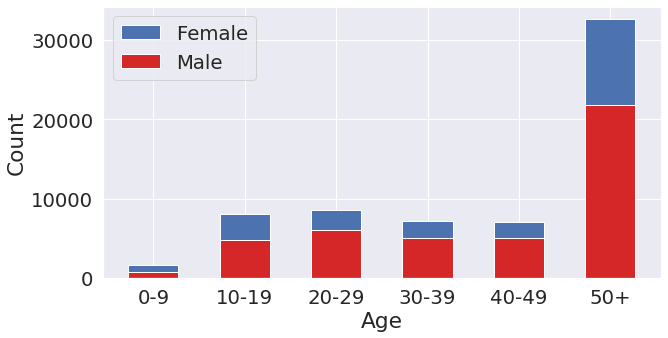

In [38]:
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["0-9","10-19","20-29","30-39","40-49","50+"]
p1 = plt.bar(categories, malecount, 0.55, color='#d62728')
p2 = plt.bar(categories, femalecount, 0.55, bottom=malecount)
plt.legend((p2[0], p1[0]), ('Female', 'Male'))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [50]:
row_sums = contingency_table.iloc[0:2, 5].values
col_sums = contingency_table.iloc[2, 0:5].values

print(row_sums)
print(col_sums)

[10771 21790]
[1657 8054 8613 7175 7062]


In [43]:
total = contingency_table.loc['All','All']
total

32561

In [45]:
df.shape[0]

32561

In [46]:
expected = []
for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
        expected_val = column*row_sums[i]/total
        expected_row.append(expected_val)
    expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 5)
[[ 548.12650103 2664.21897362 2849.13310402 2373.45060041 2336.07082092]
 [1108.87349897 5389.78102638 5763.86689598 4801.54939959 4725.92917908]]


In [47]:
observed = pd.crosstab(df['sex'], df['age_categories']).values
print(observed.shape)
observed

(2, 5)


array([[ 810, 3176, 2576, 2161, 2048],
       [ 847, 4878, 6037, 5014, 5014]])

In [51]:
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 454.4898295235139


In [52]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")

Degrees of Freedom: 4


In [53]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 454.4898295235139
P-value: 4.647170308895553e-97
Degrees of Freedom: 4
Expected: 
 [[ 548.12650103 2664.21897362 2849.13310402 2373.45060041 2336.07082092]
 [1108.87349897 5389.78102638 5763.86689598 4801.54939959 4725.92917908]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

3. I believe my code is elegant, readable, and can be easily run for all issues. Perhaps I just don't know any better yet, but this code is pluggable and playable with any categorical data set. If the data set is not categorical, there is also a bit of code here that that can make it categorical.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)